## Задание 1
1. Реализовать kmeans
2. Визуализировать сходимость центров кластеров
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

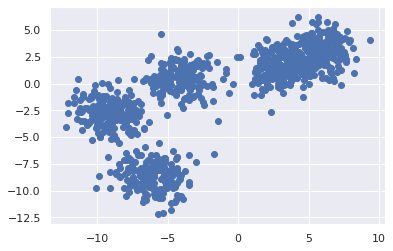

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

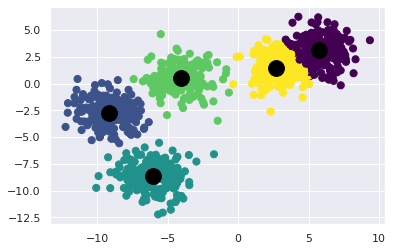

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=1);

In [30]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)

        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

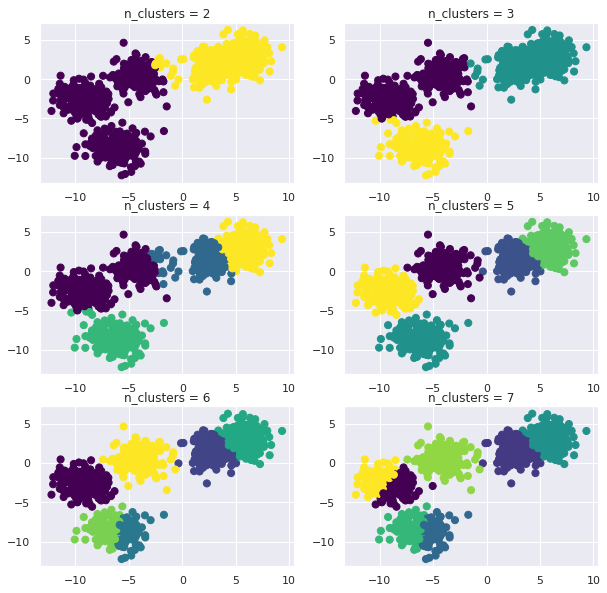

In [31]:
plt.figure(figsize=(10,10))
for nw_crs in range (2,8):
    centers, labels = find_clusters(X, nw_crs)
    plt.subplot(3, 2, nw_crs-1)
    plt.scatter(X[:, 0], X[:, 1], c=labels,
                s=50, cmap='viridis');
    plt.title('n_clusters = {}'.format(nw_crs))
plt.show()    

In [32]:
SSE = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    SSE.append(km.inertia_)

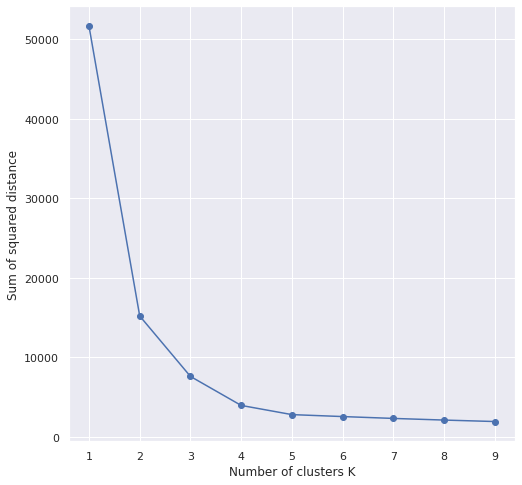

In [33]:
plt.figure(figsize=(8, 8))
plt.plot(list_k, SSE, '-o')
plt.xlabel(r'Number of clusters K')
plt.ylabel('Sum of squared distance');

## Задание 2
1. Исследуйте данные с помощью pandas. Посмотрите на признаки и их распределения. (Например, постройте график распределения автомобилей по годам, типу топлива и т.д.)
2. Кластеризуйте данные с помощью KMeans из sklearn.clustering. Найдите оптимальное число кластеров
3. Произведите анализ получившихся кластеров:


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('2.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])

In [17]:
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35019 entries, 0 to 61065
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Марка         35019 non-null  object 
 1   Год           35019 non-null  float64
 2   Состояние     35019 non-null  object 
 3   Пробег        35019 non-null  float64
 4   Объем         35019 non-null  float64
 5   Топливо       35019 non-null  object 
 6   Мощность      35019 non-null  float64
 7   Кузов         35019 non-null  object 
 8   Привод        35019 non-null  object 
 9   КПП           35019 non-null  object 
 10  Руль          35019 non-null  object 
 11  Хозяев в ПТС  35019 non-null  object 
 12  Цена          35019 non-null  float64
dtypes: float64(5), object(8)
memory usage: 3.7+ MB


In [19]:
df["Марка"].value_counts()

ВАЗ                5497
Toyota             2700
Nissan             2064
Hyundai            1897
Volkswagen         1885
                   ... 
DongFeng              1
Oldsmobile            1
Renault Samsung       1
IKCO                  1
Ravon                 1
Name: Марка, Length: 92, dtype: int64

In [20]:
df["Год"].value_counts()

2008.0    3761
2012.0    3376
2007.0    3254
2011.0    3197
2013.0    2691
2006.0    2280
2010.0    2094
2014.0    1619
2005.0    1451
2004.0    1443
2009.0    1225
2003.0    1140
2001.0    1034
2002.0     966
2015.0     849
2000.0     845
1999.0     639
1998.0     580
1997.0     569
2016.0     445
1996.0     338
1995.0     262
1993.0     260
1994.0     226
1992.0     192
1991.0     155
1990.0     108
2017.0      20
Name: Год, dtype: int64

In [21]:
df["Кузов"].value_counts()

седан          14241
хэтчбек         8462
кроссовер       4980
внедорожник     3359
универсал       1893
минивэн         1188
купе             519
пикап            314
кабриолет         31
лимузин           26
родстер            6
Name: Кузов, dtype: int64

In [22]:
df["Привод"].value_counts()

передний    23933
полный       8481
задний       2605
Name: Привод, dtype: int64

In [23]:
df.describe()

,Год,Пробег,Объем,Мощность,Цена
count,35019.000000,35019.000000,35019.000000,35019.000000,3.501900e+04
mean,2007.370056,120830.338559,1877.595020,128.989606,4.889877e+05
std,5.332053,69805.918666,617.729308,52.277648,4.765761e+05
min,1990.000000,5.000000,100.000000,1.000000,8.000000e+03
25%,2004.000000,70000.000000,1500.000000,90.000000,1.900000e+05
50%,2008.000000,110000.000000,1600.000000,116.000000,3.700000e+05
75%,2012.000000,160000.000000,2000.000000,150.000000,6.200000e+05
max,2017.000000,363000.000000,4600.000000,333.000000,6.900000e+06


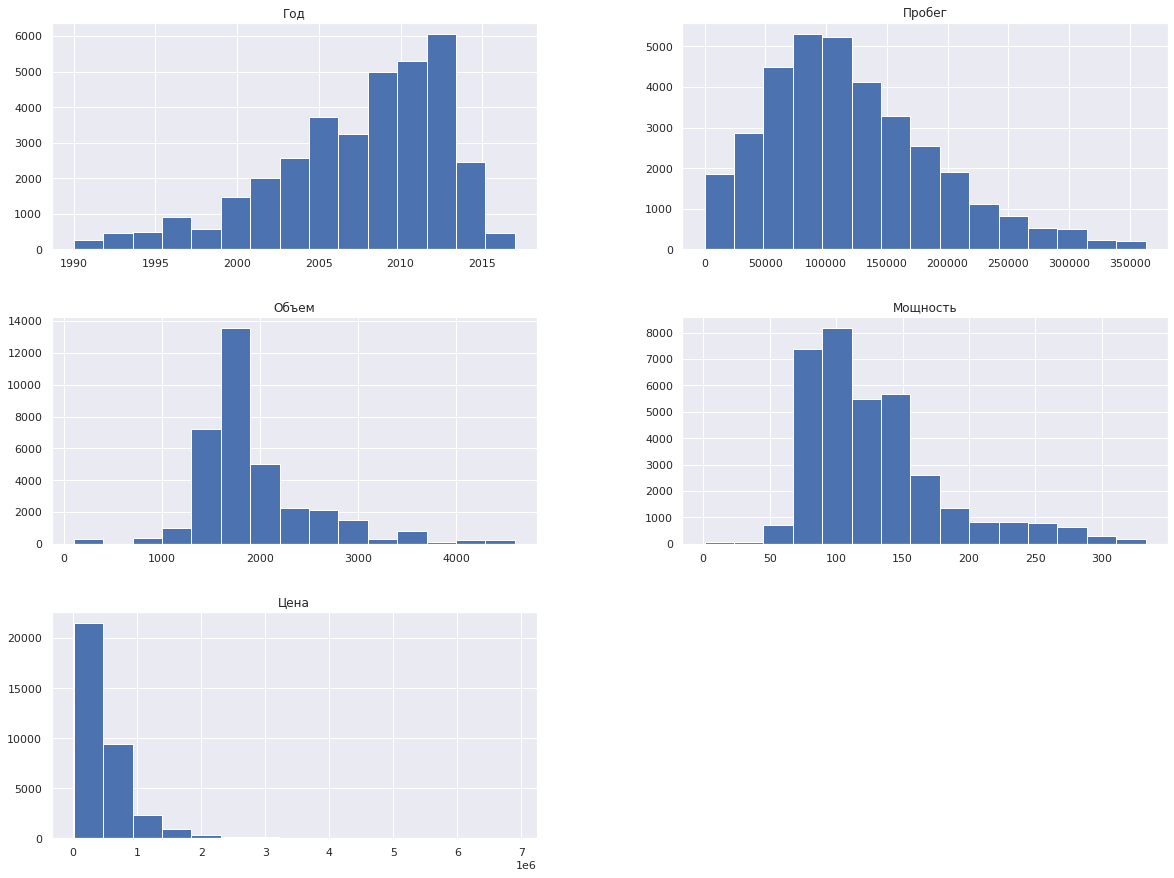

In [24]:
df.hist(bins = 15, figsize = (20, 15))
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer


In [26]:
print('Количество строк = ', df.shape[0])
print('Количество колонок = ', df.shape[1])

Количество строк =  35019
Количество колонок =  13
